# Petits jeux avec les images

## Importer une image

Nous allons manipuler des images pour donner les bases de futurs travaux en SVT par exemple.

Tout d'abord nous allons charger les bibliothèques utiles. La 3e va nous servir à récuperer des images disponibles en ligne.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlretrieve

In [7]:
url = "https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/98/9843d072473afaffb2c910416993d7cb0845395c_full.jpg"
urlretrieve(url, filename="./kermit.jpg")
kermit = plt.imread("./kermit.jpg")

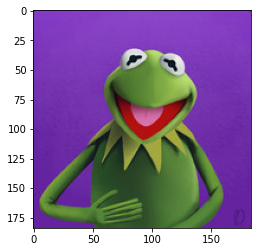

In [8]:
plt.imshow(kermit)

In [13]:
type(kermit)

numpy.ndarray

Nous allons donc créer des alias de type pour faciliter la lecture : 

In [16]:
image = np.ndarray
pixel = np.ndarray

Une image est en fait une matrice :

In [9]:
kermit

array([[[ 73,  66,  82],
        [ 95,  62, 131],
        [123,  58, 188],
        ...,
        [123,  58, 188],
        [ 94,  61, 130],
        [ 72,  65,  81]],

       [[ 96,  63, 132],
        [114,  59, 160],
        [131,  58, 192],
        ...,
        [132,  59, 193],
        [115,  60, 161],
        [ 96,  63, 132]],

       [[123,  58, 188],
        [131,  58, 192],
        [140,  58, 195],
        ...,
        [140,  58, 195],
        [131,  58, 192],
        [123,  58, 188]],

       ...,

       [[ 92,  35, 152],
        [ 96,  35, 156],
        [104,  35, 160],
        ...,
        [105,  36, 165],
        [ 95,  33, 158],
        [ 90,  36, 147]],

       [[ 79,  47, 110],
        [ 87,  41, 131],
        [ 96,  35, 156],
        ...,
        [101,  36, 162],
        [ 82,  35, 131],
        [ 81,  52, 106]],

       [[ 79,  66,  83],
        [ 83,  51, 114],
        [ 93,  36, 153],
        ...,
        [ 98,  38, 160],
        [ 76,  40, 110],
        [ 81,  71,  79]]

C'est une matrice dont les coefficients sont des triplets `[R, G, B]`, chacune des composantes étant codée sur 8 bits (un octet) ce qui explique le `dtype=uint8`.
On vérifie lorsqu'on demande le format de l'image:

In [10]:
kermit.shape

(184, 184, 3)

## Jouer avec Kermit

### Miroir

Il s'agit d'avoir la vision miroir de Kermit:

In [17]:
def miroir(im: image) -> image:
    h, w, _ = im.shape
    return np.array([[im[i, w - 1 - j] for j in range(w)] for i in range(h)])

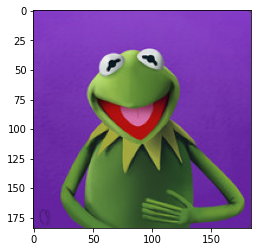

In [18]:
plt.imshow(miroir(kermit))

### Tête en bas

à vous de jouer pour fabriquer une fonction qui renverse kermit :

In [20]:
def renverse(im: image) -> image:
    h, w, _ = im.shape
    return np.array([[im[h - 1 - i, j] for j in range(w)] for i in range(h)])

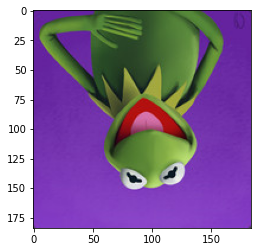

In [21]:
plt.imshow(renverse(kermit))

### Régime

Créer une fonction qui ne prend qu'une colonne sur 2 de l'image originale :

In [22]:
def un_sur_deux(im: image) -> image:
    h, w, _ = im.shape
    return np.array([[im[i, 2*j] for j in range(w // 2)] for i in range(h)])

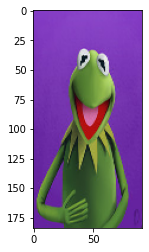

In [23]:
plt.imshow(un_sur_deux(kermit))

Adapter pour en fait choisir le facteur de régime (amaigrissant ou grossissant) :

In [24]:
def ratio_im(im: image, ratio: float) -> image:
    h, w, _ = im.shape
    return np.array([[im[i, int(j/ratio)] for j in range(int(w*ratio))] for i in range(h)])

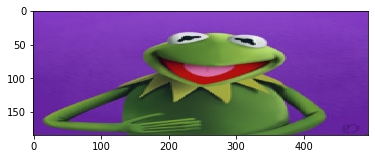

In [25]:
plt.imshow(ratio_im(kermit, 2.7))

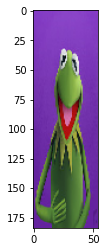

In [28]:
plt.imshow(ratio_im(kermit, 0.3))

### Niveau de gris : première tentative

Du gris, c'est les composantes R, G et B au même niveau. Une première idée est de prendre la moyenne des trois niveaux pour chaque pixel : faites !

In [45]:
def grise_1(im: image) -> image:
    return np.array([[np.repeat(int(np.sum(pixel) / 3), 3) for pixel in ligne] for ligne in im])

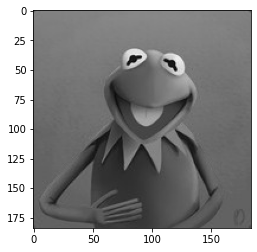

In [46]:
plt.imshow(grise_1(kermit))

### Niveau de gris : la luminance

On s'aperçoit que l'image est un peu sombre. Or les composantes R, G et B  n'ont pas la même importance dans le calcul de la luminance. De plus leur "influence" n'est pas linéaire (2 fois plus d'intensité ne veut pas dire 2 fois plus de luminance). Il y a une évolution exponentielle qui correspond aussi à la perception de l'œil humain.

On commence d'abord par corriger les coefficients RGB. Voici la correction correspondant au standard sRGB utilisé sur les écrans d'ordinateur:

$$
V' = \begin{cases} 1,055\times V_S^{1/2,4} - 0,055 \quad \text{ si } 0,0031308 < V_S \leqslant 1\\
12,92\times V_S \quad \text{ si } 0,0031308\geqslant V_S \geqslant 0\end{cases}
$$

avec $V_S$ le signal électrique de chaque composante RGB rapporté sur $[0,1]$.

On calcule ensuite la luminance : $Y=0,2126R'+0,7152G'+0,0722B'$.

Construisez une fonction qui renvoie la matrice de luminance.

In [40]:
def grise_pix(pix: pixel) -> pixel:
    r, g, b = pix
    lin = lambda vs : 1.055*vs**(1/24) - 0.055 if 0.0031308 <vs<=1 else 12.92*vs
    for vs in [r,g,b]:
        vs = int(255*lin(vs/255))
    g = int(0.2126*r + 0.7152*g+0.0722*b)
    return np.array([g, g, g], dtype='uint8')

def grise(im: image) -> image:
    return np.array([[grise_pix(pixel) for pixel in ligne] for ligne in im])

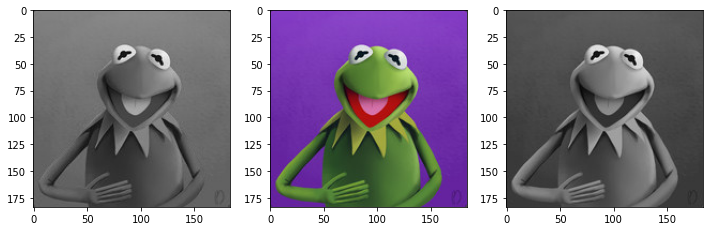

In [50]:
_, imtab = plt.subplots(1, 3, figsize=(12, 12))

imtab[0].imshow(grise_1(kermit))
imtab[1].imshow(kermit)
imtab[2].imshow(grise(kermit))

### Changement d'énergie : gradient.

Notre but va être de détecter les contours d'une image. Cela peut correspondre au changement abrupt de niveau d'énergie, i.e. de luminace.

En physique, lorsqu'on étudie les échanges d'énergie thermique entre des corps, on calcule le *gradient* $\nabla T(x,y)$ de température à savoir le vecteur de coordonnées 

$$\left(\dfrac{\partial T}{\partial x},\dfrac{\partial T}{\partial y} \right)$$

si l'on travaille dans le plan. C'est un vecteur orthogonal aux courbes isothermes. 

On peut remplacer la température par la luminance. Le problème est que le calcul du gradient nécessite l'existence d'une fonction différentiable alors que notre image est une matrice avec des valeurs discrètes : pas de calcul de dérivées possible.

Il existe de nombreuses méthodes. Nous prendrons la plus simple: $$\nabla I(i,j)\approx \left(\frac{I(i+1, j)-I(i-1, j)}{2},\frac{I(i, j+1)-I(i, j-1)}{2}\right)$$

L'énergie retenue sera la norme de ce vecteur.

In [60]:
def norme_int(x: int, y: int) -> int:
    return int(np.sqrt(x**2 + y**2))

def energie(im: image) -> image:
    h, w, _ = im.shape
    e = np.zeros(im.shape, dtype='uint8')
    for i in range(1, h - 1):
        for j in range(1 , w - 1):
            dx = (int(im[i+1, j,0]) - int(im[i-1, j,0])) // 2
            dy = (int(im[i, j+1,0]) - int(im[i, j-1,0])) // 2
            e[i, j] = norme_int(dx, dy)
    return e

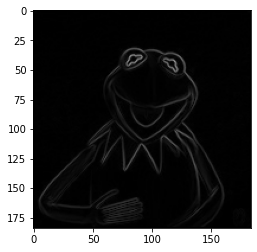

In [61]:
plt.imshow(energie(grise(kermit)))

On peut tenter d'inverser les couleurs :

In [110]:
def energie(im: image) -> image:
    h, w, _ = im.shape
    e = np.zeros(im.shape, dtype='uint8')
    for i in range(1, h - 1):
        for j in range(1 , w - 1):
            dx = (int(im[i+1, j,0]) - int(im[i-1, j,0])) / 2
            dy = (int(im[i, j+1,0]) - int(im[i, j-1,0])) / 2
            e[i, j] = 255 - norme_int(dx, dy)
    return e

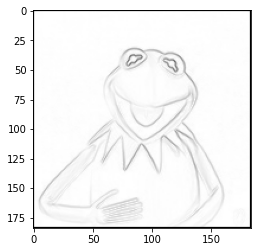

In [111]:
kermit_g = grise(kermit)
plt.imshow(energie(kermit_g))

Pas mieux. On va tenter un seuillage : à partir d'un certain niveau de luminance, on va mettre le pixel en noir. Créons pour cela une fonction bw :

In [112]:
def bw(im: image, seuil: int) -> image:
    return np.array([[[255]*3 if px[0] > seuil else [0]*3 for px in ligne] for ligne in im])

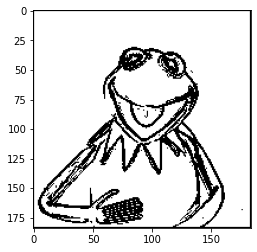

In [113]:
plt.imshow((bw(energie(kermit_g), 245)))

Mmm... ça bave. Pour y remédier, nous allons tenter de lisser en effaçant les pixels qui "bruitent" les contours. Nous allons considérer les voisins immédiats d'un pixel et nous allons prendre la médiane de ces voisins pour atténuer la présence de pixels extrêmes.
Pour cela, nous allons considérer la sous-matrice centrée en l epixel considéré et de "rayon" fixé $n$. Pour éviter les problèmes sur les bords de la matrice, nous pouvons par exemple ne considérer que la partie qui ne "déborde" pas. Y aurait-il d'autres méthodes ?
Pour le calcul de la médiane, on peut utiliser `np.median` et pour extraire une sous-matrice on utilisera le saucissonage :

In [115]:
kermit[120:123, 30:33, 0]

array([[105, 105, 108],
       [107, 108, 103],
       [108, 108, 107]], dtype=uint8)

In [116]:
np.median(kermit[120:123, 30:33, 0])

107.0

In [117]:
def flou(img: image, n: int) -> image:
    h, w, _ = img.shape
    f = np.zeros((h, w, 3), dtype='uint8')
    for i in range(n, h - n):
        for j in range(n , w - n):
            g = int(np.median(img[i-n : i+1+n, j-n : j+n+1, 0]))
            f[i, j] = [g, g, g]
    return f

In [122]:
kermit_bw = bw(energie(kermit_g), 240)

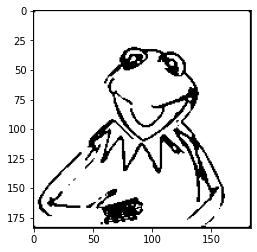

In [123]:
plt.imshow(flou(kermit_bw, 1))

Et dans l'ordre inverse ?

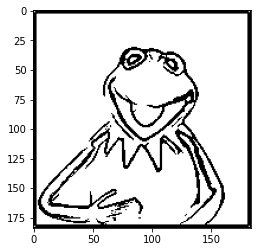

In [130]:
kermit_flou = energie(flou(kermit_g, 2))
plt.imshow(bw(kermit_flou, 245))

## Cas plus réels

En fait, dans des problèmes concrets, on travaille rarement sur des marionettes de grenouilles. Prenons une tomate :

In [131]:
url2 = "https://media.cdnws.com/_i/63827/59/197/59/tomate-copie-346-346-filled.jpeg"
urlretrieve(url2, filename="./tomate.jpg")
tomate = plt.imread("./tomate.jpg")

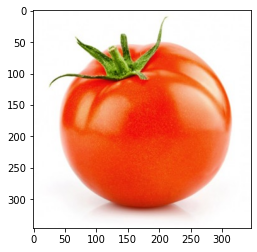

In [132]:
plt.imshow(tomate)

In [133]:
tomate_g = grise(tomate)

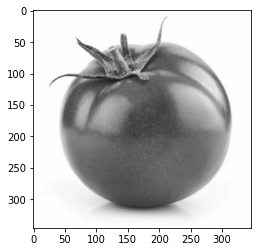

In [135]:
plt.imshow(tomate_g)

In [136]:
tomate_seuil = bw(tomate_g, 230)

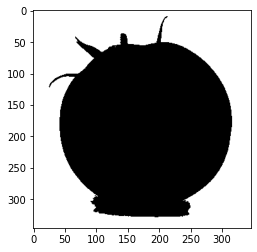

In [137]:
plt.imshow(tomate_seuil)

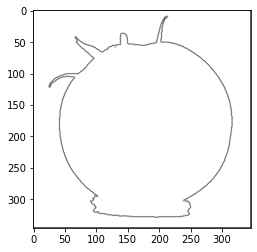

In [138]:
plt.imshow(energie(tomate_seuil))

Une banane 

In [139]:
url3 = "https://img.over-blog.com/170x170/3/10/47/74/Dossier-4/banane.jpg"
urlretrieve(url3, filename="./banane.jpg")
banane = plt.imread("./banane.jpg")

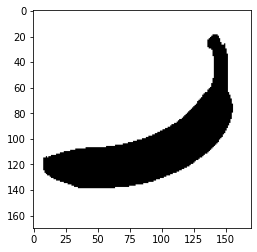

In [141]:
banane_g = grise(banane)
banane_seuil = bw(banane_g, 230)
plt.imshow(banane_seuil)

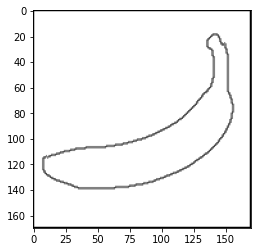

In [142]:
plt.imshow(energie(banane_seuil))

## Des bactéries

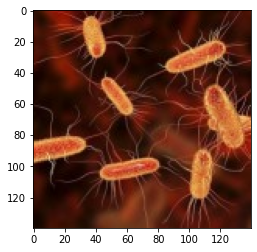

In [143]:
#url4 = "https://www.rtflash.fr/sites/default/files/imagecache/format_article/microbes_et_bacteries_modifient_notre_comportement.jpg"
url4 = "https://mens-en-gezondheid.infonu.nl/artikel-foto-upload/aandoeningen/73800-ehec-bacterie-symptomen-bloedige-diarree-en-buikkrampen.jpg?74af6"
#url4 = "https://thumbs.dreamstime.com/t/bleu-de-cinq-microbes-vu-dans-un-microscope-57162039.jpg"
urlretrieve(url4, filename="./bacterie.jpg")
bacterie = plt.imread("./bacterie.jpg")
plt.imshow(bacterie)

In [144]:
bacterie_g = grise(bacterie)

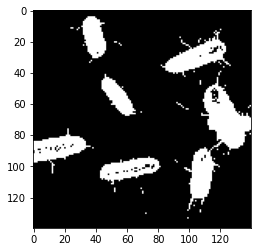

In [161]:
bacterie_seuil = bw(bacterie_g, 90)
plt.imshow(bacterie_seuil)

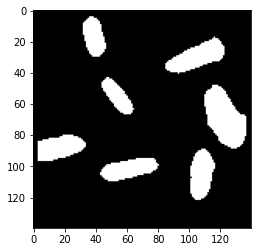

In [162]:
bacterie_flou = flou(bacterie_seuil, 3)
plt.imshow(bacterie_flou)

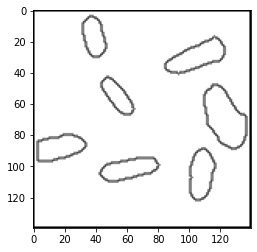

In [163]:
plt.imshow(energie(bacterie_flou))

## Du sable

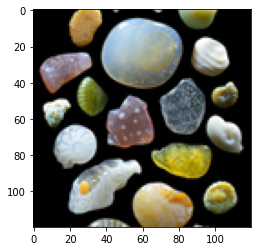

In [155]:
url5 = "https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fsandgrains.com%2FP_Maui-15B-web-copyT.jpg&f=1&nofb=1"
urlretrieve(url5, filename="./sable.jpg")
sable = plt.imread("./sable.jpg")
plt.imshow(sable)

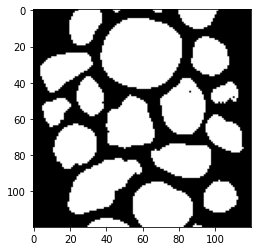

In [158]:
sable_g = grise(sable)
sable_seuil = bw(sable_g, 50)
plt.imshow(sable_seuil)

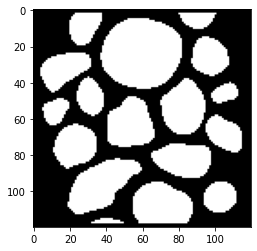

In [168]:
sable_flou = flou(sable_seuil, 2)
plt.imshow(sable_flou)

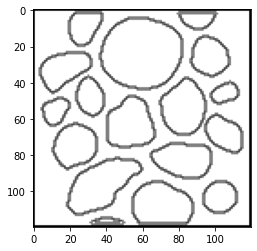

In [169]:
plt.imshow(energie(sable_flou))

## Poursuite du travail

- La fonction `flou` est un exemple de [filtre par convolution](https://fr.wikipedia.org/wiki/Noyau_(traitement_d%27image). Il y en a bien d'autres. Essayez d'en créer quelques-une  

- Quand nous aurons un peu étudié la théorie des graphes, nous pourrons alors [compter combien](https://en.wikipedia.org/wiki/Connected-component_labeling) il y a de bactéries ou de grains de sables sur l'image.

- Quand nous aurons fait un peu d'algo avancée, nous pourrons par exemple enlever des pixels peu énergétiques pour alléger l'image sans perdre d'informations importantes à l'aide de l'algorithme [*recadrage intelligent*](https://fr.wikipedia.org/wiki/Seam_carving) 


In [170]:
def convolution(img: image, filtre: np.ndarray) -> image:
    h, w, _ = img.shape
    f = np.zeros((h, w, 3), dtype = 'uint8')
    for i in range(1, h - 1):
        for j in range(1 , w - 1):
            voisins = img[i-1 : i+2, j-1 : j+2, 0]
            g = int(np.sum(voisins * filtre))
            f[i, j] = [g, g, g]
    return f

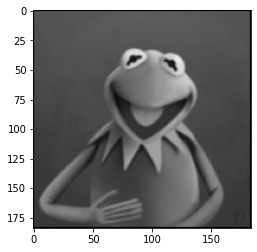

In [172]:
gauss = (1/16)*np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
kermit_gauss = convolution(kermit_g, gauss)
plt.imshow(kermit_gauss)

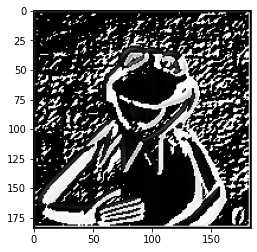

In [177]:
contour1 = np.array([[1,0,-1],[0,0,0,],[-1,0,1]])
contour2 = 0.5*np.array([[0,-1,0],[-1,0,1],[0,1,0]])
canny = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
plt.imshow(convolution(kermit_gauss, contour2))